**420-A58-SF - Algorithmes d'apprentissage non supervisé - Hiver 2023 - Spécialisation technique en Intelligence Artificielle**<br/>
MIT License - Copyright (c) 2023 Mikaël Swawola
<br/>
![Travaux Pratiques - partitionnement-k-moyennes (implementation)](static/01-02-A1-banner.png)
<br/>
**Objectif:** cette séance de travaux pratiques a pour objectif l'implémentation sous forme de code Python de l'**algorithme des K-moyennes** et de sa mise en œuvre

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## 1 - Lecture des données

**Exercice 1 - À l'aide de la librairie Pandas, lire le fichier de données `blobs.csv`**

In [2]:
# Compléter cette cellule ~ 2 lignes de code
import pandas as pd
blobs = pd.read_csv('../../data/blobs.csv')
blobs

,x0,x1
0,10.947841,2.028498
1,3.675247,-10.206901
2,5.809632,4.076479
3,8.053083,1.129893
4,5.681480,4.405307
...,...,...
995,8.770883,-0.006383
996,3.638953,-9.169461
997,5.560394,4.679340
998,8.805843,1.299326


## 2 - Visualisation des données

**Exercice 2 - En utilisant un type de graphique approprié, visualiser les données. Combien de clusters semblent présents ?**

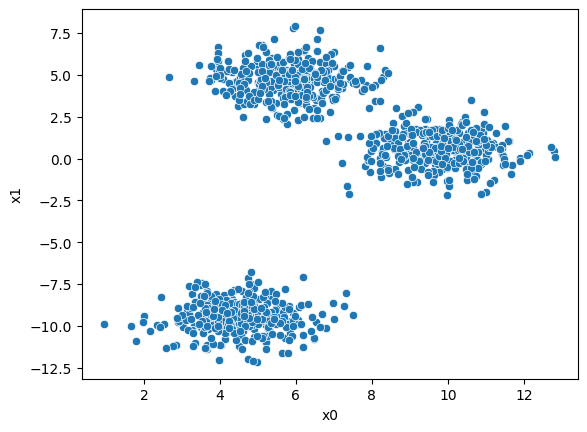

In [3]:
# Compléter cette cellule ~ de 2 à 7 lignes de code
import seaborn as sns

_ = sns.scatterplot(x="x0", y="x1", data=blobs)

## 3 - Implémentation de l'algorithme des K-moyennes

**Exercice 3-1 - Initialiser la variable K, représentant le nombre de clusters estimé à partir de la visualisation précédente**

In [4]:
# Compléter cette cellule ~ 1 ligne de code
K = 3

**Exercice 3-2 - Mettre les données à l'échelle. Visualiser de nouveau les données**

In [5]:
# Compléter cette cellule ~ 3 lignes de code
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(blobs)

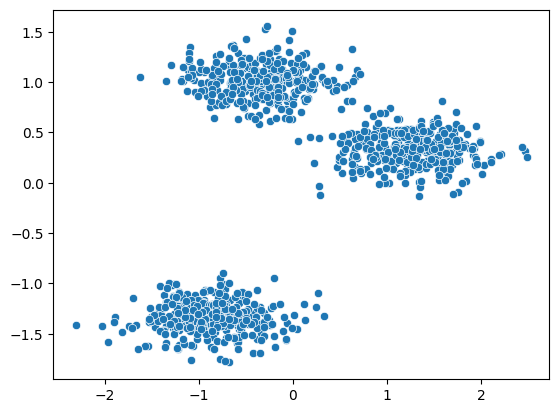

In [6]:
_ = sns.scatterplot(x=X[:,0], y=X[:,1], data=X)

**Exercice 3-3 - Initialiser les K centroïdes. Pour ce, vous pouvez choisir aléatoirement K observations.** 

In [7]:
import numpy as np
np.random.seed(2023)

# Compléter cette cellule ~ de 2 à 4 lignes de code

random_obs = np.random.choice(X.shape[0], size = K, replace=False)
centroids = X[random_obs]

centroids

#centroids.shape -> (3,2)

array([[-0.78374588, -1.09767698],
       [-0.76494377,  1.07966587],
       [ 1.83367271,  0.0181017 ]])

**Exercice 3-4 - Sur la visualisation, afficher la position des K centroïdes initiaux**

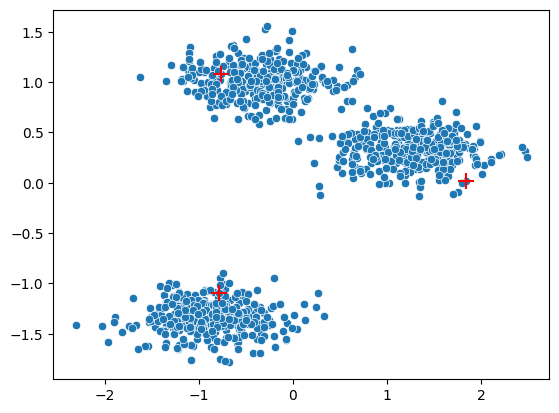

In [8]:
import matplotlib.pyplot as plt

# Compléter cette cellule ~ de 2 à 4 lignes de code
_ = sns.scatterplot(x=X[:,0], y=X[:,1], data=X)
plt.scatter(centroids[:,0], centroids[:,1], c='r', marker="+", s=120)

**Exercice 3-5 - Afin de faciliter l'implémentation ultérieure de l'algorithme des K-moyennes, calculer la distance euclidienne (L2) entre le point A (-1,-1) et chacun des K centroïdes. Trouver ensuite l'index du centroïde le plus proche**

In [9]:
# Compléter cette cellule ~ 4 lignes de code
A = np.array([-1,-1])

L2 = np.sqrt(np.sum((A - centroids)**2, axis=1))
plus_proche = np.argmin(L2)
plus_proche
print(f'Centroïde le plus proche: {plus_proche} - {centroids[plus_proche,:]} ({np.min(L2)})')

Centroïde le plus proche: 0 - [-0.78374588 -1.09767698] (0.23729020144775473)


**Exercice 3-6 - Implémenter l'algorithme des K-moyennes tel que vu en cours. Pour appel, le *pseudo code* de l'algorithme est le suivant:**
* Choix de K (fait plus haut, exercice 3-1)
* Standardisation des données (fait plus haut, exercice 3-2)
* Initialisation des K centroïdes (fait plus haut, exercice 3-3)
* Pour n_iterations: **(partie à coder !)**
    * Assignation des observations à un cluster (centroïde le plus "proche"). La distance euclidienne sera utilisée ici (exercice 3-5)
    * Déplacement des centroïdes (moyenne des observations associées à un cluster)

<details>
<summary>
    <font size="3" color="darkgreen"><b>Cliquer ici pour obtenir un indice</b></font>
</summary>
<p>
Vous devrez créer un tableau représentant le cluster associé à chaque observation
</p>

In [10]:
# Compléter cette cellule ~ de 10 à 20 lignes de code

max_iter = 10
c = np.zeros(shape=(X.shape[0], 1))

for i in range(1, max_iter):

    # Assignation
    for j, x in enumerate(X):
        L2 = np.sqrt(np.sum((x - centroids)**2, axis=1))
        c[j] = np.argmin(L2)
        
    # Calcul de la moyenne
    for k in range(0, K):
        mask = (c == k).flatten()
        nouvelle_val = X[mask,:].mean(axis=0)
        centroids[k,:] = nouvelle_val

**Exercice 3-7 - Afficher la position des clusters. Visualiser également les observations et leur association à un des K clusters**

<details>
<summary>
    <font size="3" color="darkgreen"><b>Cliquer ici pour obtenir un indice</b></font>
</summary>
<p>
Utiliser `hue`
</p>

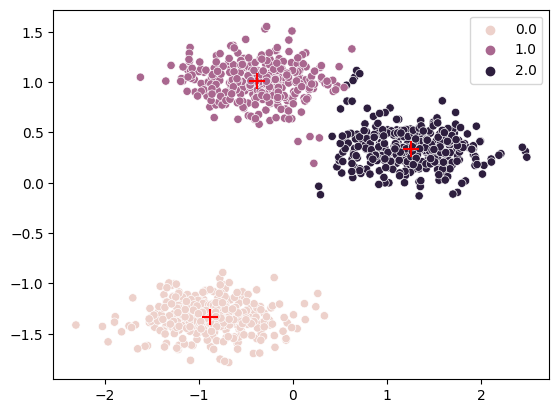

In [11]:
# Compléter cette cellule ~ de 2 à 4 lignes de code
_ = sns.scatterplot(x=X[:,0], y=X[:,1], data=X, hue=c[:,0])
plt.scatter(centroids[:,0], centroids[:,1], c='r', marker="+", s=120)

**Exercice 3-8 - Calculer la distorsion**

In [15]:
# Compléter cette cellule ~ 2 lignes de code
mu_c = centroids[c.squeeze().astype(int),:]

distortion = np.sum(np.sqrt(np.sum((X-mu_c)**2, axis=1)))/X.shape[0]

distortion

0.3790914170625205

## 4 - Intégration de l'algorithme dans une fonction

**Exercice 4 - Intégrer l'ensemble de l'algorithme des K-moyennes, incluant l'initalisation aléatoire des K centroïdes `n_init` fois, dans une fonction**
<br/>
* Cette fonction prend en argument les données, le nombre de clusters, le nombre d'itérations de l'algorithme et le nombre d'initialisations aléatoires des K centroïdes
* Les valeurs retournées sont la distorsion et les centroïdes

In [35]:
# Compléter cette cellule
def Kmeans(pX, pK, pMax_iter=10, pN_init=10):

    best_centroids = None
    best_dist = 1e20
    
    for i in range(0, pN_init):

        # centroids initiaux au hazard
        random_obs = np.random.choice(pX.shape[0], size = pK, replace=False)
        centroids = pX[random_obs]
    
        print('------[BEGIN Kmeans]----------')
        print('iteration [i]: ', i)
        print('----centroids---')
        print(centroids)

        max_iter = pMax_iter

        c = np.zeros(shape=(pX.shape[0], 1))

        max_iter = pMax_iter
        for i in range(1, max_iter):

            # Assignation
            for j, x in enumerate(pX):
                L2 = np.sqrt(np.sum((x - centroids)**2, axis=1))
                c[j] = np.argmin(L2)
        
            # Calcul de la moyenne
            for k in range(0, pK):
                mask = (c == k).flatten()
                nouvelle_val = pX[mask,:].mean(axis=0)
                centroids[k,:] = nouvelle_val

            # calcul distortion
            mu_c = centroids[c.squeeze().astype(int),:]
            print('[mu_c]: ', mu_c)
            print('pX.shape[0]: ',  pX.shape[0])
            print('np.sum(np.sqrt(np.sum((pX-mu_c)**2, axis=1))): ', np.sum(np.sqrt(np.sum((pX-mu_c)**2, axis=1))))

            distortion = np.sum(np.sqrt(np.sum((pX-mu_c)**2, axis=1)))/pX.shape[0]

            if distortion < best_dist:
                best_dist = distortion
                best_centroids = centroids
            print('-----distortion---')
            print(distortion)


    print('------[END Kmeans]----------')

    return distortion, centroids

In [36]:
distort, centr = Kmeans(X, 3 )

------[BEGIN Kmeans]----------
iteration [i]:  0
----centroids---
[[-1.5198162  -1.2486587 ]
 [-0.34168007 -1.56432294]
 [ 0.78373805  0.43795043]]
[mu_c]:  [[ 0.44690392  0.66919225]
 [-1.22368099 -1.30848531]
 [ 0.44690392  0.66919225]
 ...
 [ 0.44690392  0.66919225]
 [ 0.44690392  0.66919225]
 [-1.22368099 -1.30848531]]
pX.shape[0]:  1000
np.sum(np.sqrt(np.sum((pX-mu_c)**2, axis=1))):  697.1338215758375
-----distortion---
0.6971338215758375
[mu_c]:  [[ 0.44379831  0.66976155]
 [-1.21613946 -1.32793843]
 [ 0.44379831  0.66976155]
 ...
 [ 0.44379831  0.66976155]
 [ 0.44379831  0.66976155]
 [-1.21613946 -1.32793843]]
pX.shape[0]:  1000
np.sum(np.sqrt(np.sum((pX-mu_c)**2, axis=1))):  696.6327914135284
-----distortion---
0.6966327914135284
[mu_c]:  [[ 0.44379831  0.66976155]
 [-1.21239036 -1.33020891]
 [ 0.44379831  0.66976155]
 ...
 [ 0.44379831  0.66976155]
 [ 0.44379831  0.66976155]
 [-1.21239036 -1.33020891]]
pX.shape[0]:  1000
np.sum(np.sqrt(np.sum((pX-mu_c)**2, axis=1))):  696.6040

## 5 - Nombre optimal de centroïdes

**Exercice 5 - Faire varier le nombre de centroïdes K de 2 à 10 et vérifier sa valeur optimale à l'aide de la technique du "coude"**

In [ ]:
# Compléter la cellule ~ 4-5 lignes de code

## 6 - Exercices optionnels

**Exercice 6-1 - Ajouter un critère de convergence**

In [ ]:
# Compléter la cellule

**Exercice 6-2 - Suppression des clusters vides**

In [ ]:
# Compléter la cellule

**Fin de l'atelier 01-02-A1**